In [10]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

city_df = city_df.drop_duplicates('city', keep = 'first')

# Combine the data into a single dataset
city_ride_df = pd.merge(ride_df, city_df, on = "city")

# Display the data table for preview
city_ride_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

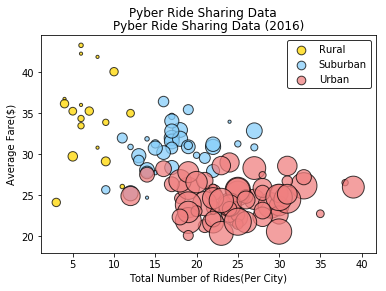

In [13]:
# Obtain the x and y coordinates for each of the three city types
city_ride_group = city_ride_df.groupby("city")

average_fare = city_ride_group.mean()["fare"]
ride_count = city_ride_group["ride_id"].count()
driver_count = city_ride_group.mean()["driver_count"]


# city type data
city_type = city_df.set_index('city')['type']

# dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": average_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})

city_info.sort_values("Number of Drivers", ascending = False)

# Build the scatter plots for each city types
rural = city_info[city_info["Type of City"] == "Rural"]
urban = city_info[city_info["Type of City"] == "Urban"]
suburban = city_info[city_info["Type of City"] == "Suburban"]

#Color Dictionary 
#color scheme dictionary and preview
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
city_color = {'Urban': color_scheme['Light Coral'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Gold']}

plt.suptitle('Pyber Ride Sharing Data')

# three scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

# Incorporate the other graph properties

# Create a legend
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fare($)')
plt.title("Pyber Ride Sharing Data (2016)")

# Save Figure
plt.savefig("bubblechart.png")


In [14]:
# Show plot
plt.show()
average_fare

city
Amandaburgh             24.641667
Barajasview             25.332273
Barronchester           36.422500
Bethanyland             32.956111
Bradshawfurt            40.064000
Brandonfort             35.437368
Carriemouth             28.314444
Christopherfurt         24.501852
Colemanland             30.894545
Davidfurt               31.995882
Deanville               25.842632
East Aaronbury          25.661111
East Danielview         31.560588
East Kaylahaven         23.757931
East Kentstad           29.823077
East Marymouth          30.835185
Erikaland               24.906667
Garzaport               24.123333
Grahamburgh             25.221200
Grayville               27.763333
Harringtonfort          33.470000
Huntermouth             28.993750
Hurleymouth             25.891429
Jerryton                25.649200
Jessicaport             36.013333
Johnton                 26.785714
Joneschester            22.289600
Josephside              32.858148
Justinberg              23.694333
Karenberg

## Total Fares by City Type

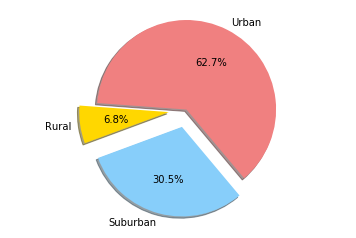

<Figure size 432x288 with 0 Axes>

In [15]:
# Calculate Type Percents
city_type_group = city_ride_df.groupby("type")['type', 'fare', 'ride_id', 'driver_count']
#city_type_group[['Rural']].count()

rural_fares = city_type_group.get_group('Rural').sum()['fare']
urban_fares = city_type_group.get_group('Urban').sum()['fare']
suburban_fares = city_type_group.get_group('Suburban').sum()['fare']

labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_fares, rural_fares, suburban_fares]
colors = [city_color[n] for n in labels]
explode = (0, 0.2, 0.2) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=-50)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



# Build Pie Chart

# Save Figure
plt.savefig("piechart1.png")


In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

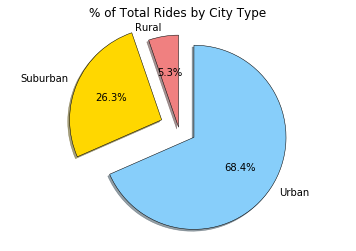

<Figure size 432x288 with 0 Axes>

In [6]:
# Calculate Ride Percents
# number of ride per city type
ride_sum = city_type_group.count()['ride_id']

labels = ride_sum.index
plt.pie(ride_sum, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

# Build Pie Chart

# Save Figure
plt.savefig("../Images/piechart2.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

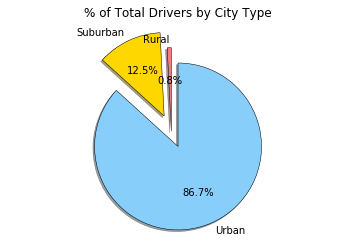

<Figure size 432x288 with 0 Axes>

In [8]:
# Calculate Driver Percents
driver_sum = city_type_group.sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()
# Build Pie Charts

# Save Figure
plt.savefig("../Images/piechart3.png")


In [9]:
# Show Figure
plt.show()